
# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Homework 4: Logistic Regression

**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2pt">



In [91]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- **This is an individual homework. No group collaboration.**
- To submit your assignment follow the instructions given in Canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

In [92]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import zipfile


import seaborn as sns
sns.set()


<div class='theme'> Cancer Classification from Gene Expressions </div>

In this problem, we will build a classification model to distinguish between two related classes of cancer, acute lymphoblastic leukemia (ALL) and acute myeloid leukemia (AML), using gene expression measurements. The data set is provided in the file `data/dataset_hw4.csv`. Each row in this file corresponds to a tumor tissue sample from a patient with one of the two forms of Leukemia. The first column contains the cancer type, with **0 indicating the ALL** class and **1 indicating the AML** class. Columns 2-7130 contain expression levels of 7129 genes recorded from each tissue sample. 

In the following questions, we will use linear and logistic regression to build classification models for this data set. 


<div class='exercise'><b> Question 1 [20 pts]: Data Exploration </b></div>

First step is to  split  the observations into an approximate 80-20 train-test split.  Below is some code to do this for you (we want to make sure everyone has the same splits). Print dataset shape before splitting and after splitting. `Cancer_type` is our target column.


**1.1** Take a peek at your training set (show a glimpse of what you did): you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands).  To account for these differences in scale and variability, normalize each predictor to vary between 0 and 1.


**1.2** The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a data set? Explain in 3 or fewer sentences.


**1.3** Identify and report which 10 genes individually discriminate between the two cancer classes the best (consider every gene in the data set).  Note: it wil lbe useful to save this list for future parts.

Plot two histograms ofyour best predictor - one using training and another for the testing dataset. Each histogram should clearly distinguish two different `Cancer_type` classes.

Hint: You may use t-testing to make this determination: #https://en.wikipedia.org/wiki/Welch%27s_t-test.


**1.4** Using your top gene from the previous part (call it  `best_predictor`), create a classification model by manually eye-balling a value for this gene that would discriminate the two classes the best. Justify your choice in 1-2 sentences. Report the accuracy of this hand-chosen model on the test set.

<hr> <hr>

<hr>
### Solutions

**First step is to split the observations into an approximate 80-20 train-test split. Below is some code to do this for you (we want to make sure everyone has the same splits). Print dataset shape before splitting and after splitting. `Cancer_type` is our target column.**

In [93]:
np.random.seed(10)
df = pd.read_csv('data/hw4_enhance.csv', index_col=0)


X_train, X_test, y_train, y_test =train_test_split(df.loc[:, df.columns != 'Cancer_type'], 
                                                         df.Cancer_type, test_size=0.2, 
                                                         random_state = 109, 
                                                         stratify = df.Cancer_type)

In [94]:

print(df.shape)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(df.Cancer_type.value_counts(normalize=True))


(752, 7130)
(601, 7129) (151, 7129) (601,) (151,)
0.0    0.511968
1.0    0.488032
Name: Cancer_type, dtype: float64


**1.1 Take a peek at your training set (show a glimpse of what you did): you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands).  To account for these differences in scale and variability, normalize each predictor to vary between 0 and 1.**


In [95]:
X_train.head()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
486,-83.669345,-129.202197,91.188553,-132.634919,-416.659258,-566.248620,-549.255222,-208.415176,213.331881,-135.518811,...,111.849800,371.083898,252.006568,963.153393,9.955941,142.181944,442.730023,42.848269,512.106908,4.677488
604,-65.718571,-302.842019,-297.819728,-177.485917,-52.709137,-218.295750,195.983474,-268.235930,-328.630912,240.058672,...,252.867110,110.033722,203.197907,101.612259,-138.398658,245.767616,247.519122,-15.430358,-398.165984,-61.694246
341,-264.191248,-162.255274,127.997172,173.771779,-185.191211,40.011778,-1562.983106,-85.344926,-119.622143,219.619110,...,20.797496,-184.115075,-227.872398,140.876523,42.543763,28.594281,204.479474,9.831559,21.718266,19.522122
117,-92.558574,-109.788332,379.542547,391.641129,-184.507364,-577.178389,-293.421369,-372.534572,190.551199,-487.331438,...,180.678776,577.889184,-50.443125,417.586154,-11.190519,1478.997020,15.923333,112.986515,-107.706335,-25.673203
516,-143.099813,140.202023,-147.163850,222.339115,-231.007621,-753.616356,274.500343,-217.513332,-107.135509,-62.470938,...,139.821329,909.588696,43.531613,718.462679,-58.238405,232.494165,754.787059,-58.160474,1808.764690,-20.782346


In [96]:
#TO DO do the min max scaler into a model and apply the same one to both

X_train_normalized = pd.DataFrame(MinMaxScaler().fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_normalized = pd.DataFrame(MinMaxScaler().fit_transform(X_test), columns=X_test.columns, index=X_test.index)

**1.2 The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a data set? Explain in 3 or fewer sentences.**

This is called the "curse of dimensionality". Basically, as the number of features increases, the space becomes so large that the data become relatively sparse, which makes it hard to achieve statistical significance. Also, it makes it hard to find groups with similar properties (since the data points are all relatively far apart in the big space), which is exactly what a classifier needs to do.

**1.3** **Identify and report which 10 genes individually discriminate between the two cancer classes the best (consider every gene in the data set).  Note: it wil lbe useful to save this list for future parts.**

**Plot two histograms of your best predictor - one using training and another for the testing dataset. Each histogram should clearly distinguish two different `Cancer_type` classes.**

**Hint: You may use t-testing to make this determination: #https://en.wikipedia.org/wiki/Welch%27s_t-test.**

In [97]:
def t_test(genes, outcomes):
    t_stats = []
    for col in genes:
        all_outcome = genes[col][outcomes == 0]
        aml_outcome = genes[col][outcomes == 1]
        all_mean = all_outcome.mean()
        aml_mean = aml_outcome.mean()

        all_se = all_outcome.std()**2/(len(all_outcome))
        aml_se = aml_outcome.std()**2/(len(aml_outcome))
        
        t_stats.append(abs((all_mean - aml_mean)) / np.sqrt(all_se + aml_se))
    return t_stats

t_test(X_train_normalized, y_train)
        
gene_corrs = pd.DataFrame(t_test(X_train, y_train),columns=['T-statistic'])
gene_corrs['gene'] = X_train_normalized.columns
top_ten_genes = pd.DataFrame(gene_corrs.nlargest(10,'T-statistic'))

These genes have the highest correlation with Cancer_type:

In [98]:
top_ten_genes

,T-statistic,gene
6854,12.537397,M31523_at
4846,12.435494,X95735_at
2287,11.870642,M84526_at
4365,11.458105,X61587_at
3319,10.986655,U50136_rna1_at
4195,10.666939,X17042_at
7118,10.487500,U29175_at
4972,10.299221,Y08612_at
5053,10.081967,Z11793_at
4581,10.024521,X76648_at


In [99]:
ALL_train = X_train_normalized[y_train==0]
AML_train = X_train_normalized[y_train==1]
ALL_test = X_test_normalized[y_test==0]
AML_test = X_test_normalized[y_test==1]

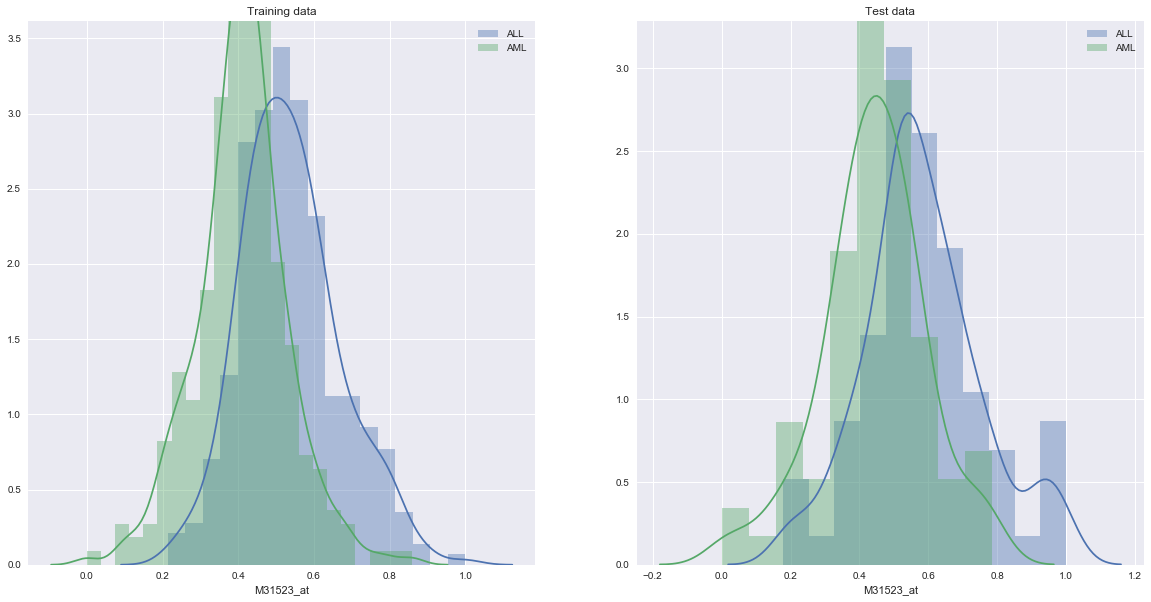

In [100]:
best_predictor = top_ten_genes['gene'].iloc[0]

fig, ax = plt.subplots(1,2, figsize=(20,10))

sns.distplot(ALL_train[best_predictor], label='ALL', ax=ax[0])
sns.distplot(AML_train[best_predictor], label='AML', ax=ax[0])
ax[0].legend()
ax[0].title.set_text('Training data')

sns.distplot(ALL_test[best_predictor], label='ALL', ax=ax[1])
sns.distplot(AML_test[best_predictor], label='AML', ax=ax[1])
ax[1].legend()
ax[1].title.set_text('Test data')

**1.4 Using your top gene from the previous part (call it  `best_predictor`), create a classification model by eye-balling a value for this gene that would discriminate the two classes the best. Justify your choice in 1-2 sentences. Report the accuracy of this hand-chosen model on the test set.**


In [101]:
print("The mean of the best_predictor for people with AML cancer is: ", AML_train[best_predictor].mean())
print("The mean of the best_predictor for people with ALL cancer is: ", ALL_train[best_predictor].mean())

cutoff = np.mean([AML_train[best_predictor].mean(), ALL_train[best_predictor].mean()])

The mean of the best_predictor for people with AML cancer is:  0.4105712342582196
The mean of the best_predictor for people with ALL cancer is:  0.5381648978933817


The means of the two are very similar (.41 for ALL versus .53 for AML). My classification model will use .47 as the arbitrary cutoff, since it's halfway between the two.

In [102]:
naive_ALL_diagnosis = X_test_normalized[X_test_normalized[best_predictor] >= cutoff]
wrong_ALL_diagnosis = naive_ALL_diagnosis[y_test==1]
print("Number of incorrect ALL diagnoses: ", len(wrong_ALL_diagnosis))

naive_AML_diagnosis = X_test_normalized[X_test_normalized[best_predictor] < cutoff]
wrong_AML_diagnosis = naive_AML_diagnosis[y_test==0]
print("Number of incorrect AML diagnoses: ", len(wrong_AML_diagnosis.shape))

Number of incorrect ALL diagnoses:  30
Number of incorrect AML diagnoses:  2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


With this naive test, we got 30 ALL diagnoses that were actually AML, and 2 AML diagnoses that were actually ALL. In total, that's 32 bad diagnoses, which out of 151 diagnoses is about 80% accurate.

<div class='exercise'><b> Question 2 [25 pts]: Linear and Logistic Regression  </b></div>


In class we discussed how to use both linear regression and logistic regression for classification. For this question, you will work with a single gene predictor that you identify as the best predictor above to explore these two methods.

**2.1** Fit a simple linear regression model to the training set using the single gene predictor `best_predictor` to predict cancer type. The scores predicted by the regression model for a patient could be interpreted as an estimate of the probability that the patient has Cancer_type=1 (AML). Is there a problem with this interpretation?


Create a figure with following items displayed on the same plot (use training data):
 - the predicted quantitative response from the linear regression model as a function of the best gene predictor
 - the true binary response. 


**2.2** Use your estimated linear regression model to classify observations into 0 and 1 using the standard Bayes' classifier.  Evaluate the classification accuracy of this classification model on both the training and test sets.


**2.3** Next, fit a simple logistic regression model to the training set. How do the training and test classification accuracies of this model compare with the linear regression model? 

Remember, you need to set the regularization parameter for sklearn's logistic regression function to be a very large value in order to **not** regularize (use 'C=100000'). 


**2.4** 
Print and interpret the logistic regression coefficients: the 'slope' and intercept. 


Create 2 plots (one each for training and testing data) with 4 items displayed on each plot.
- the predicted quantitative response from the linear regression model as a function of the best gene predictor.
- the predicted probabilities of the logistic regression model as a function of the best gene predictor. 
- the true binary response. 
- a horizontal line at $y=0.5$. 

Based on these plots, does one of the models appear better suited for binary classification than the other?  Explain in 3 sentences or fewer. 



<hr>
### Solutions

**2.1** **Fit a simple linear regression model to the training set using the single gene predictor `best_predictor` to predict cancer type. The scores predicted by the regression model for a patient could be interpreted as an estimate of the probability that the patient has Cancer_type=1 (AML).  Is there a problem with this interpretation?**

Create a figure with following items displayed on the same plot (use training data):

1) the predicted quantitative response from the linear regression model as a function of the best gene predictor
2) the true binary response.

Text(0.5,1,'Linear regression')

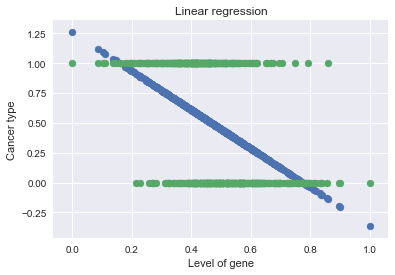

In [103]:
best_predictor_train = X_train_normalized[best_predictor].values.reshape(-1, 1) 
best_predictor_test = X_test_normalized[best_predictor].values.reshape(-1, 1) 

lin_reg = LinearRegression().fit(best_predictor_train, y_train)
lin_reg_predictions_train = lin_reg.predict(best_predictor_train)
lin_reg_predictions_test = lin_reg.predict(best_predictor_test)


plt.scatter(best_predictor_train, lin_reg_predictions_train)
plt.scatter(best_predictor_train, y_train)
plt.xlabel("Level of gene")
plt.ylabel("Cancer type")
plt.title("Linear regression")

The problem here is that since our outcomes can only be 0 or 1, a linear regression doesn't really make sense. Linear regression models require continuous target variables to really make sense. 

**2.2** **Use your estimated linear regression model to classify observations into 0 and 1 using the standard Bayes' classifier.  Evaluate the classification accuracy of this classification model on both the training and test sets.**

In [104]:
train_classifier = list(map(lambda x: float(x > .5), lin_reg_predictions_train))
test_classifier = list(map(lambda x: float(x > .5), lin_reg_predictions_test))

print("Percentage accuracy of train: ", len([i for i, j in zip(train_classifier, y_train) if i == j])/len(y_train))
print("Percentage accuracy of test: ", len([i for i, j in zip(test_classifier, y_test) if i == j])/len(y_test))

Percentage accuracy of train:  0.7088186356073212
Percentage accuracy of test:  0.6821192052980133



**2.3** **Next, fit a simple logistic regression model to the training set. How do the training and test classification accuracies of this model compare with the linear regression model? Are the classifications substantially different?  Explain why this is the case.**

**Remember, you need to set the regularization parameter for sklearn's logistic regression function to be a very large value in order to **not** regularize (use 'C=100000').

In [105]:
log_reg = LogisticRegression(C=100000).fit(best_predictor_train, y_train)

log_reg_predictions_train = log_reg.predict_proba(best_predictor_train)
log_reg_predictions_test = log_reg.predict_proba(best_predictor_test)
print("R2 score using logistic regression: ", log_reg.score(best_predictor_test, y_test))

R2 score using logistic regression:  0.668874172185


The $R^2$ score of the logistic regression model is .66, which isn't really any better than the linear regression model from before. Basically, the Bayes classifier is a generative model, whereas the logistic regression is a discriminative model. The classification accuracies aren't much different at all.

**2.4 Print and interpret the logistic regression coefficients: the 'slope' and the intercept.**

**Create 2 plots (with training and test data) with 4 items displayed on each plot.**
- the predicted quantitative response from the linear regression model as a function of the best gene predictor.
- the predicted probabilities of the logistic regression model as a function of the best gene predictor. 
- the true binary response. 
- a horizontal line at $y=0.5$.

**Based on these plots, does one of the models appear better suited for binary classification than the other?  Explain in 3 sentences or fewer.** 


In [106]:
print("The 'slope' is: ", log_reg.coef_[0][0])
print("The intercept is: ", log_reg.intercept_[0])

The 'slope' is:  -8.75710451451
The intercept is:  4.07726907773


The intercept is the log of the odds of having AML. The coefficient is the log of the odds ratio between AML and ALL groups.

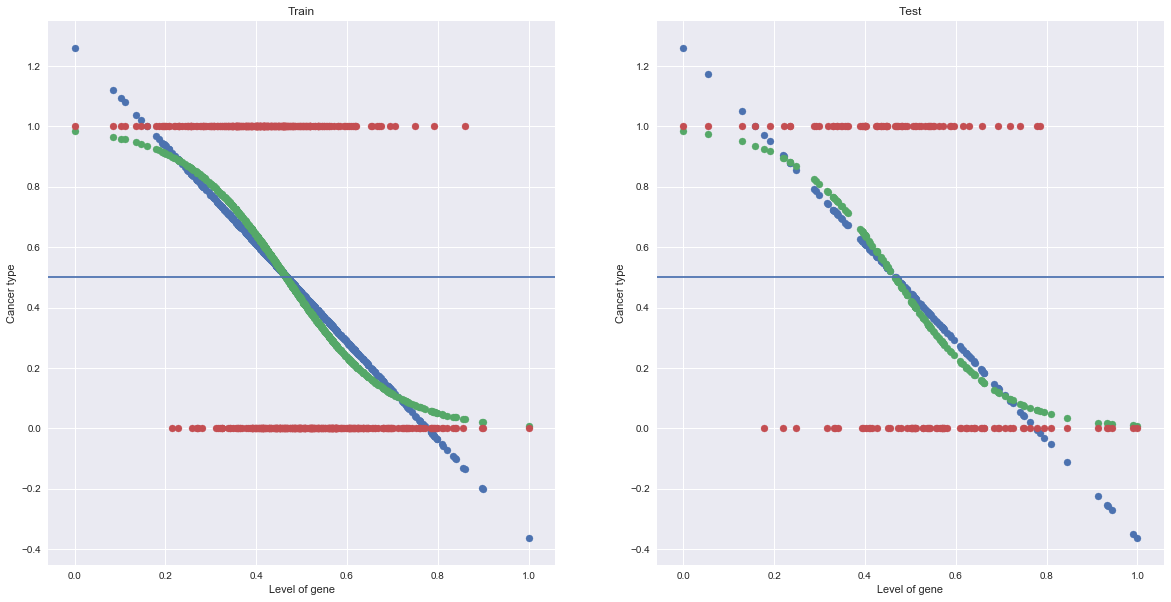

In [107]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

X = [best_predictor_train, best_predictor_test]
log_X = [best_predictor_train[np.argsort(log_reg_predictions_train[:,1])], best_predictor_test[np.argsort(log_reg_predictions_test[:,1])]]
Y_lin_pred = [lin_reg_predictions_train, lin_reg_predictions_test]
Y_log_pred = [np.sort(log_reg_predictions_train[:,1]), np.sort(log_reg_predictions_test[:,1])]
Y = [y_train, y_test]
title = ["Train", "Test"]

for i in (0,1):
    ax[i].scatter(X[i], Y_lin_pred[i])
    ax[i].scatter(log_X[i], Y_log_pred[i])
    ax[i].scatter(X[i], Y[i])
    ax[i].axhline(.5)
    ax[i].set_xlabel("Level of gene")
    ax[i].set_ylabel("Cancer type")
    ax[i].title.set_text(title[i])

The logistic model seems better for classification, because it isn't just a straight line. At levels near .5, it forms a more vertical slope, showing that slight variations push a prediction towards 0 or 1.

<div class='exercise'> <b> Question 3 [20pts]: Multiple Logistic Regression </b> </div>


**3.1** Next, fit a multiple logistic regression model with all the gene predictors from the data set.  How does the classification accuracy of this model compare with the models fitted in question 2 with a single gene (on both the training and test sets)?  


**3.2** How many of the coefficients estimated by this multiple logistic regression in the previous part are significantly different from zero at a *significance level of 5%*? Use the same value of C=100000 as before.

**Hint:** To answer this question, use *bootstrapping* with 100 bootstrap samples/iterations.  


**3.3** Comment on the classification accuracy of training and test set? Given the results above how would you assess the generalization capacity of your trained model? What other tests would you suggest to better guard against false sense of security on the accuracy of the model as a whole? 

**3.4** Now use regularization to improve predictions from the multiple logistic regression model.  Use LASSO-like regularization and cross-validation within the training set to tune the model.  Report the classification accuracy on both the training and test set.

**3.5** Do the 10 best predictors from Q1 hold up as important features in this regularized model?  If not, explain why this is the case (feel free to use the data to support your explanation).

<hr>
### Solutions

**3.1** **Next, fit a multiple logistic regression model with all the gene predictors from the data set.  How does the classification accuracy of this model compare with the models fitted in question 2 with a single gene (on both the training and test sets)?**  


In [108]:
mult_log_reg = LogisticRegression(C=100000).fit(X_train_normalized, y_train)
y_pred_train = mult_log_reg.predict(X_train_normalized)
y_pred_test = mult_log_reg.predict(X_test_normalized)

print("Accuracy score for multiple logistic regression on training data: ", accuracy_score(y_pred_train, y_train))
print("Accuracy score for multiple logistic regression on test data: ", accuracy_score(y_pred_test, y_test))

Accuracy score for multiple logistic regression on training data:  1.0
Accuracy score for multiple logistic regression on test data:  0.761589403974


**3.2** **How many of the coefficients estimated by this multiple logistic regression in the previous part are significantly different from zero at a *significance level of 5%*? Use the same value of C=100000 as before.**

**Hint:** **To answer this question, use *bootstrapping* with 1000 bootstrap samples/iterations.**  


In [109]:
def bootstrap(n, X, y):
    coefs = []
    for i in range(0,n):
        x_sample = X.sample(n=100, replace=True)
        y_sample = y.ix[x_sample.index]
        reg = LogisticRegression(C=100000).fit(x_sample, y_sample)
        coefs.append(reg.coef_[0])
    return coefs

In [110]:
def coef_z_scores(coefs):
    coefs = pd.DataFrame(coefs, columns=X_train_normalized.columns)
    t_scores = []
    for col in coefs:
        t_scores.append(coefs[col].mean()/np.sqrt(coefs[col].std()**2/len(coefs[col])))
    return t_scores

In [111]:
coefs = bootstrap(100, X_train_normalized, y_train)

print("Number of significant coefficients: ", len(list(filter(lambda x: abs(x)>1.96, coef_z_scores(coefs)))))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


Number of significant coefficients:  5456


**3.3 Open question: Comment on the classification accuracy of training and test set? Given the results above how would you assest the generalization capacity of your trained model? What other tests would you suggest to better guard against false sense of security on the accuracy of the model as a whole.**

The classification accuracy of the training set is much higher thant the test set. Overall, the test set has pretty high accuracy, at .76. However, given that we're talking about health outcomes (and specifically cancer diagnoses, where a mistake could cost someone their life), I wouldn't call this model generalizable in a real-life context. I would want to test the model using a dataset that also included people without cancer.

**3.4 Now use regularization to improve predictions from the multiple logistic regression model.  Use LASSO-like regularization and cross-validation within the training set to tune the model.  Report the classification accuracy on both the training and test set.**

In [112]:
multi_log_reg_lasso = LogisticRegressionCV(penalty='l1', solver='liblinear').fit(X_train_normalized, y_train)
print("Training R2: ", multi_log_reg_lasso.score(X_train_normalized, y_train))
print("Testing R2: ", multi_log_reg_lasso.score(X_test_normalized, y_test))

Training R2:  0.908485856905
Testing R2:  0.82119205298


**3.5: Do the 10 best predictors from Q1 hold up as important features in this regularized model?  If not, explain why this is the case (feel free to use the data to support your explanation).**

In [113]:
top_ten_coefs = pd.DataFrame(multi_log_reg_lasso.coef_, columns=X_train_normalized.columns).sort_values(by=0, axis=1).columns[:10]

print("Genes with highest coefficents: ")
for x in top_ten_coefs: print (x)
    
print("\n10 best predictors from Q1: ")
for x in (list(top_ten_genes['gene'])): print(x)
    
print("\nOverlap between the two lists: ", np.intersect1d(top_ten_coefs, list(top_ten_genes['gene'])))

Genes with highest coefficents: 
L78833_cds2_at
M31523_at
HG2562-HT2658_s_at
U29175_at
X98172_at
X97267_rna1_s_at
M65214_s_at
U18271_cds3_s_at
X71348_at
U02493_at

10 best predictors from Q1: 
M31523_at
X95735_at
M84526_at
X61587_at
U50136_rna1_at
X17042_at
U29175_at
Y08612_at
Z11793_at
X76648_at

Overlap between the two lists:  ['M31523_at' 'U29175_at']


Two genes overlap between the two lists: ['M31523_at' 'U29175_at']. This suggests that our naive approach was on the right track, but the model was able to discern better which genes truly matter. 

<div class='exercise'> <b> Question 4 [25pts]: Multi Class Log Regression </b> </div>

**4.1** Load the data from `hw4_mc_enhance.csv.zip` and examine its structure. How many instances of each class are there in our dataset? 

**4.2** Split the dataset into train and test, 80-20 split, random_state = 8. 

We are going to utilize these two features - 'M31523_at', 'X95735_at'.  Create a scatter plot of these two features using the training dataset.  It should be easily discernable via labeling/marking in the plot which observations belong to which `cancer_type`.

**4.3** Fit the following two models using crossvalidation: 
- Logistic Regression Multiclass model with linear features. 
- Logistic Regression Multiclass model with Polynomial features, degree = 2.

**4.4** Plot the decision boundaries for each model and interpret the results. Hint: You may utilize the function `overlay_decision_boundary`. 

**4.5** Report and plot the CV scores for the two models and interpret. 


<hr>
### Solutions

**4.1 Load the data from `hw4_mc_enhance.csv.zip` and examine its structure. How many instances of each class are there in our dataset?**

In [114]:
df = pd.read_csv('data/hw4_mc_enhance.csv')
df.describe()

,Unnamed: 0,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,cancer_type
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,374.50000,-1014.598658,-1048.357272,-823.358695,-315.636838,-1295.949886,-1625.120199,-826.955064,-1175.612555,-588.598064,...,812.768978,-747.263549,16.272227,-801.847334,1031.081628,-3.162310,-723.364564,-40.495922,-810.150889,1.000000
std,216.65064,297.369331,233.933609,392.662256,215.534283,320.799277,419.687380,562.688520,288.546511,227.362605,...,663.320928,176.481127,751.988770,157.068732,966.569338,495.241653,138.805059,882.681724,176.347552,0.817041
min,0.00000,-2010.202020,-1772.451092,-1619.756151,-930.821077,-1984.530972,-2514.619404,-2766.759937,-1725.591441,-1255.146509,...,-375.241836,-1484.465401,-853.838447,-1367.829068,-571.900054,-838.747726,-1162.232820,-1266.486530,-1298.638023,0.000000
25%,187.25000,-1141.429466,-1218.887728,-1076.151552,-454.824979,-1548.108060,-1848.322368,-1203.978707,-1371.756006,-718.014815,...,322.566010,-847.468558,-335.783011,-924.099294,337.355440,-356.629007,-820.617263,-435.750013,-933.182073,0.000000
50%,374.50000,-1033.862143,-1024.510062,-896.612263,-255.321214,-1257.060242,-1701.504007,-875.340089,-1138.486182,-586.848142,...,639.993676,-750.170322,-130.115409,-783.870080,777.827303,-180.519462,-733.242628,-261.276132,-816.239345,1.000000
75%,561.75000,-837.607536,-885.604686,-560.246417,-196.687009,-1092.191607,-1259.153655,-508.663556,-978.433566,-416.287415,...,1355.814050,-654.438425,117.823076,-706.793736,1571.382500,209.283781,-609.175359,36.278669,-708.453545,2.000000
max,749.00000,-385.768608,-477.363374,130.829434,257.521293,-304.800847,-850.745403,929.737460,-466.326738,196.149024,...,2482.375600,-230.208352,5082.744968,-428.086002,4221.275650,1363.790953,-427.657222,5845.204223,-268.531949,2.000000


In [115]:
print("Number of cases of each type of cancer_type: \n", df.cancer_type.value_counts())

Number of cases of each type of cancer_type: 
 2.0    250
1.0    250
0.0    250
Name: cancer_type, dtype: int64


**4.2 Split the dataset into train and test, 80-20 split, random_state = 8.**

**We are going to utilize these two features - 'M31523_at', 'X95735_at'.  Create a scatter plot of these two features using training dataset.  We should be able to discern from the plot which sample belongs to which `cancer_type`.** 

In [116]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'cancer_type'], 
                                                         df.cancer_type, test_size=0.2, 
                                                         random_state = 8, 
                                                         stratify = df.cancer_type)

#TO DO do the min max scaler into a model and apply the same one to both

X_train_normalized = pd.DataFrame(MinMaxScaler().fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_normalized = pd.DataFrame(MinMaxScaler().fit_transform(X_test), columns=X_test.columns, index=X_test.index)

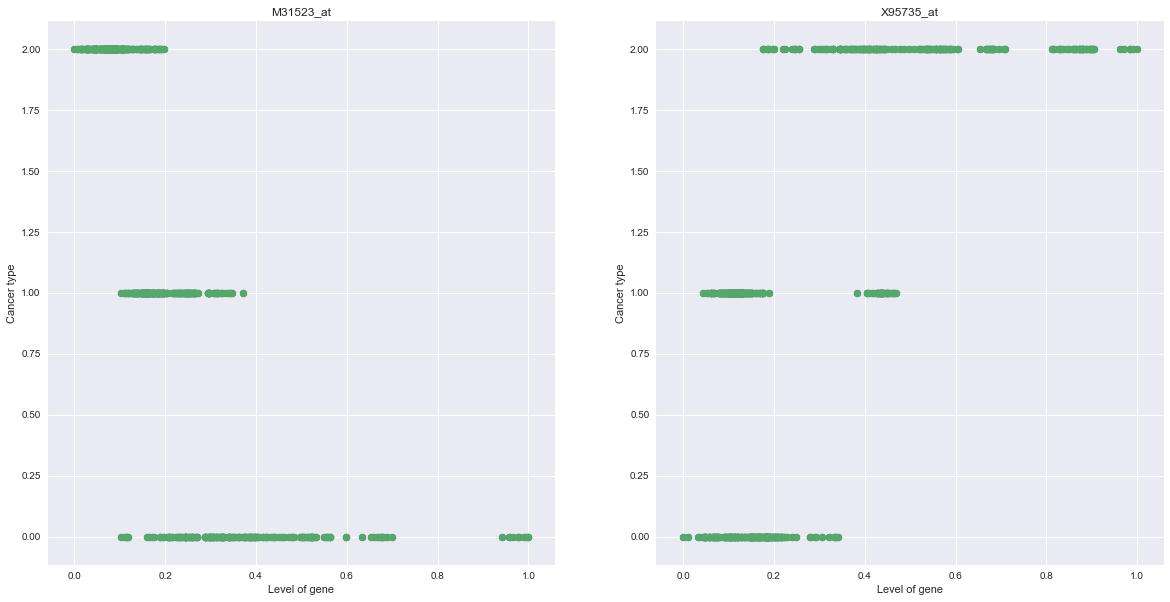

In [117]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

genes = ['M31523_at', 'X95735_at']

for i in (0,1):
    ax[i].scatter(X_train_normalized[genes[i]], y_train)
    ax[i].scatter(X_train_normalized[genes[i]], y_train)
    ax[i].set_xlabel("Level of gene")
    ax[i].set_ylabel("Cancer type")
    ax[i].title.set_text(genes[i])

**4.3  Fit the following two models using crossvalidation:**

**Logistic Regression Multiclass model with linear features.**

**Logistic Regression Multiclass model with Polynomial features, degree = 2.**


In [118]:
linear_lr = LogisticRegressionCV(solver='lbfgs').fit(X_train_normalized[['M31523_at', 'X95735_at']], y_train)

X_train_poly = X_train_normalized[['X95735_at', 'M31523_at']]
X_train_poly['M31523_at * M31523_at'] = X_train_normalized['M31523_at']**2
X_train_poly['X95735_at * X95735_at'] = X_train_normalized['X95735_at']**2

poly_lr = LogisticRegressionCV(solver='lbfgs').fit(X_train_poly, y_train)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


**4.4 Plot the decision boundary and interpret results. Hint: You may utilize the function `overlay_decision_boundary`** 


In [127]:
def overlay_decision_boundary(ax, model, model_type, colors=None, nx=196, ny=196, desaturate=.5, xlim=None, ylim=None):
    """
    A function that visualizes the decision boundaries of a classifier.
    
    ax: Matplotlib Axes to plot on
    model: Classifier to use.
     - if `model` has a `.predict` method, like an sklearn classifier, we call `model.predict(X)`
     - otherwise, we simply call `model(X)`
    colors: list or dict of colors to use. Use color `colors[i]` for class i.
     - If colors is not provided, uses the current color cycle
    nx, ny: number of mesh points to evaluated the classifier on
    desaturate: how much to desaturate each of the colors (for better contrast with the sample points)
    xlim, ylim: range to plot on. (If the default, None, is passed, the limits will be taken from `ax`.)
    """
    # Create mesh.
    xmin, xmax = ax.get_xlim() if xlim is None else xlim
    ymin, ymax = ax.get_ylim() if ylim is None else ylim
    
    if (model_type == 'poly'):
        nx = 14
        ny = 14
        xx, yy, cc, dd = np.meshgrid(
            np.linspace(0, 1, nx),
            np.linspace(0, 1, ny),
            np.linspace(0, 1, ny),
            np.linspace(0, 1, ny))
        X = np.c_[xx.flatten(), yy.flatten(), cc.flatten(), dd.flatten()]

        model = getattr(model, 'predict', model)
        y = model(X)
        y = y.astype(int) # This may be necessary for 32-bit Python.
        nx2 = nx**2
        ny2 = ny**2
        nx = 196
        ny = 196
        y = y.reshape((nx2, ny2))

    elif (model_type == 'linear'):
        xx, yy = np.meshgrid(
            np.linspace(xmin, xmax, nx),
            np.linspace(ymin, ymax, ny))
        X = np.c_[xx.flatten(), yy.flatten()]
        model = getattr(model, 'predict', model)
        y = model(X)
        y = y.astype(int) # This may be necessary for 32-bit Python.
        y = y.reshape((nx, ny))

    # Generate colormap.
    if colors is None:
        # If colors not provided, use the current color cycle.
        # Shift the indices so that the lowest class actually predicted gets the first color.
        # ^ This is a bit magic, consider removing for next year.
        colors = (['white'] * np.min(y)) + sns.utils.get_color_cycle()

    if isinstance(colors, dict):
        missing_colors = [idx for idx in np.unique(y) if idx not in colors]
        assert len(missing_colors) == 0, f"Color not specified for predictions {missing_colors}."

        # Make a list of colors, filling in items from the dict.
        color_list = ['white'] * (np.max(y) + 1)
        for idx, val in colors.items():
            color_list[idx] = val
    else:
        assert len(colors) >= np.max(y) + 1, "Insufficient colors passed for all predictions."
        color_list = colors
    color_list = [sns.utils.desaturate(color, desaturate) for color in color_list]
    cmap = matplotlib.colors.ListedColormap(color_list)

    # Plot decision surface
    print("Y: ", y, "\nnx and ny: ", nx, ny, "\nxx: ", xx.shape, "\nyy: ", yy.shape)

    # TO DO use the meshgrid for the linear model to graph (check dims of Y)
    xx, yy = np.meshgrid(
        np.linspace(xmin, xmax, nx),
        np.linspace(ymin, ymax, ny))
    #ax.pcolormesh(xx, yy, y, zorder=-2, cmap=cmap, norm=matplotlib.colors.NoNorm(), vmin=0, vmax=y.max() + 1)

    xx = xx.reshape(nx, ny)
    yy = yy.reshape(nx, ny)
    
    if len(np.unique(y)) > 1:
        ax.contour(xx, yy, y, colors="black", linewidths=1, zorder=-1)
    else:
        print("Warning: only one class predicted, so not plotting contour lines.")

Y:  [[1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [2 1 1 ..., 0 0 0]
 ..., 
 [2 2 2 ..., 0 0 0]
 [2 2 2 ..., 0 0 0]
 [2 2 2 ..., 0 0 0]] 
nx and ny:  196 196 
xx:  (196, 196) 
yy:  (196, 196)
Y:  [[1 1 1 ..., 0 0 0]
 [2 1 1 ..., 0 0 0]
 [2 2 2 ..., 0 0 0]
 ..., 
 [0 1 1 ..., 0 0 0]
 [0 1 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]] 
nx and ny:  196 196 
xx:  (14, 14, 14, 14) 
yy:  (14, 14, 14, 14)


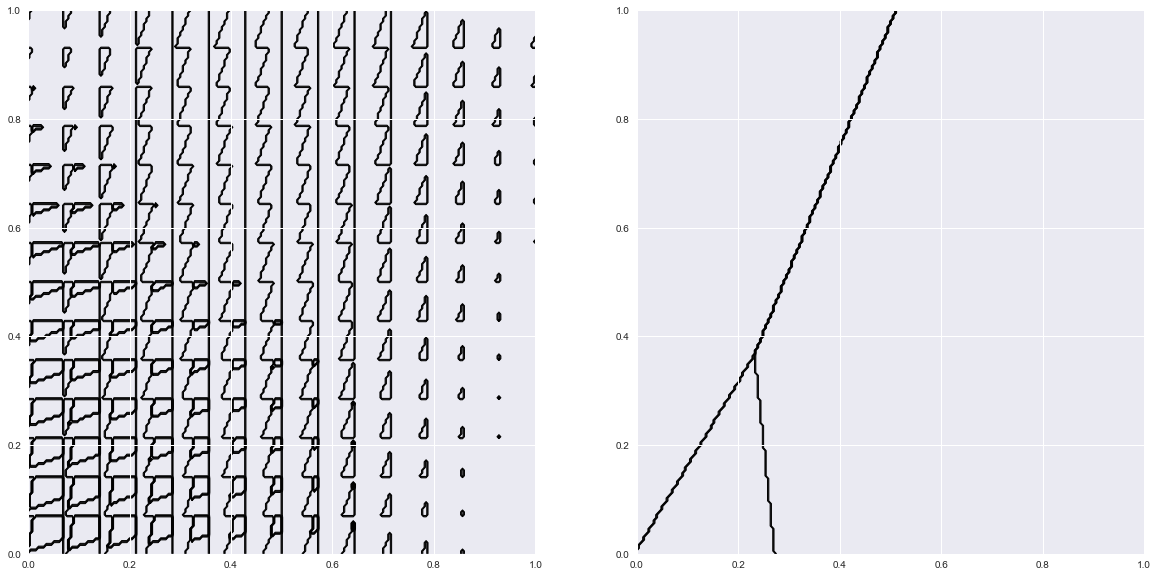

In [128]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

overlay_decision_boundary(ax[1], linear_lr, 'linear')
overlay_decision_boundary(ax[0], poly_lr, 'poly')


**4.5 Report and plot the CV scores for the two models and interpret.**

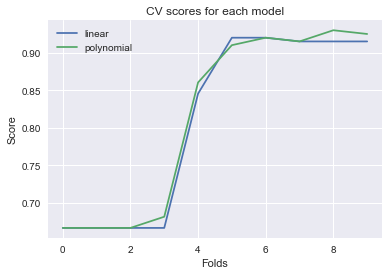

In [129]:
plt.plot(linear_lr.scores_.get(0.0)[0], label='linear')
plt.plot(poly_lr.scores_.get(0.0)[0], label='polynomial')
plt.xlabel("Folds")
plt.ylabel("Score")
plt.title("CV scores for each model")
plt.legend()

The polynomial model ended up with the highest score, but both models showed a noticeable uptick in accuracy after the 4 folds mark.

<div class='exercise'><b> Question 5: [10 pts] Including an 'abstain' option </b></div>

One of the reasons a hospital might be hesitant to use your cancer classification model is that a misdiagnosis by the model on a patient can sometimes prove to be very costly (e.g. if the patient were to file a law suit seeking a compensation for damages). One way to mitigate this concern is to allow the model to 'abstain' from making a prediction: whenever it is uncertain about the diagnosis for a patient. However, when the model abstains from making a prediction, the hospital will have to forward the patient to a specialist, which would incur additional cost.  How could one design a cancer classification model with an abstain option, such that the cost to the hospital is minimized?

*Hint:* Think of ways to build on top of the logistic regression model and have it abstain on patients who are difficult to classify.

**5.1** More specifically, suppose the cost incurred by a hospital when a model mis-predicts on a patient is $\$5000$ , and the cost incurred when the model abstains from making a prediction is \$1000. What is the average cost per patient for the OvR logistic regression model (without quadratic or interaction terms) from **Question 4**.  Note that this needs to be evaluated on the patients in the test set. 

**5.2** Design a classification strategy (into the 3 groups plus the *abstain* group) that has as low cost as possible per patient (certainly lower cost per patient than the logistic regression model).   Give a justification for your approach.

<hr>
### Solutions

**5.1 More specifically, suppose the cost incurred by a hospital when a model mis-predicts on a patient is $\$5000$ , and the cost incurred when the model abstains from making a prediction is \$1000. What is the average cost per patient for the OvR logistic regression model (without quadratic or interaction terms) from Question 4.  Note that this needs to be evaluated on the patients in the test set.**
**
...
**

In [130]:
def cost_per_patient(y_pred, y_actual):
    abstains = 0
    errors = 0
    for i, j in zip(y_pred, y_test):
        if i == -1: 
            abstains+=1
        elif i != j:
            errors+=1
    return ((abstains * 1000) + (errors * 5000))/len(y_pred)

In [131]:
y_pred = linear_lr.predict(X_test_normalized[['X95735_at', 'M31523_at']])

print("Avg cost per patient of model: $", (len([i for i, j in zip(y_pred, y_test) if i != j]) * 5000)/len(y_pred))

Avg cost per patient of model: $ 4600.0


**5.2 Design a classification strategy (into the 3 groups plus the *abstain* group) that has as low cost as possible per patient (certainly lower cost per patient than the logistic regression model).   Give a justification for your approach.**

In [132]:
probabilities = linear_lr.predict_proba(X_train_normalized[['X95735_at', 'M31523_at']])

In [133]:
def set_abstain_level(p, y_pred):
    for i in range(0, len(y_pred)):
        if np.amax(probabilities[i]) < p:
            y_pred[i] = -1
    return y_pred

In [134]:
costs = []
for p in np.arange(0, 1, .05):
    costs.append(cost_per_patient(set_abstain_level(p, y_pred), y_test))

print("Lowest cost per patient: $", np.amin(costs))

Lowest cost per patient: $ 1180.0
